# Decision Tree

Use the titanic data

# 1
What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire
from prepare import prep_titanic
from prepare import my_train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = prep_titanic()
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [7]:
my_train_test_split(df, target='survived')
train, validate, test = my_train_test_split(df, 'survived')

In [8]:
train.shape

(534, 12)

In [9]:
validate.shape

(178, 12)

In [10]:
test.shape

(179, 12)

# 2
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [19]:
# create split, dropping target
x_train = train.drop(columns=['survived','sex','embark_town'])
y_train = train.survived

x_val = validate.drop(columns=['survived','sex','embark_town'])
y_val = validate.survived

x_test = test.drop(columns=['survived','sex','embark_town'])
y_test = test.survived

In [20]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

In [21]:
tree = tree.fit(x_train, y_train)

In [22]:
tree

DecisionTreeClassifier(max_depth=3, random_state=123)

In [31]:
y_pred = tree.predict(x_train)

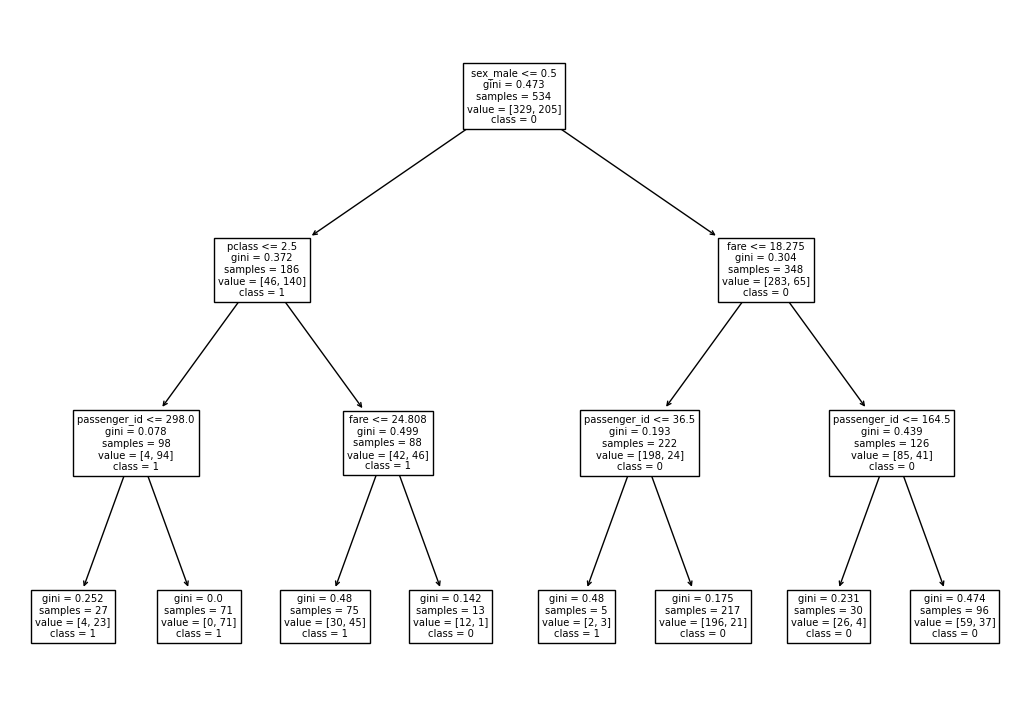

In [34]:
plt.figure(figsize=(13,9))
plot_tree(tree, feature_names=x_train.columns, class_names=['0','1'])
plt.show()

# 3
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [35]:
tree.score(x_train, y_train)

0.8146067415730337

In [37]:
print(confusion_matrix(y_train, y_pred))

[[293  36]
 [ 63 142]]


In [36]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



# 4
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [38]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(293, 36, 63, 142)

In [43]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
support = TP+FN
support_ = FP+TN

print('The description of this model is:')
print('Accuracy: {}'.format(round(accuracy,2)))
print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('True pos. rate: {}'.format(round(TPR,2)))
print('False pos. rate: {}'.format(round(FPR,2)))
print('True neg. rate: {}'.format(round(TNR,2)))
print('False neg. rate: {}'.format(round(FNR,2)))
print('F1 score: {}'.format(round(F1,2)))
print('Support pos: {}'.format(support))
print('Support neg: {}'.format(support_))


The description of this model is:
Accuracy: 0.81
Precision: 0.8
Recall: 0.69
True pos. rate: 0.69
False pos. rate: 0.11
True neg. rate: 0.89
False neg. rate: 0.31
F1 score: 0.74
Support pos: 205
Support neg: 329


# 5
Run through steps 2-4 using a different max_depth value.